# LAB: Visualización

## Introducción

El objetivo de este LAB es aplicar los conceptos aprendidos de visualización. Observaremos un dataset que contiene información de los resultados de una maratón. La información está desagregada para corredor del maratón.

Los campos que contiene son:
1. age
2. gender
3. split: tiempo que tardó en correr la primera mitad de la maratón
4. final: tiempo que tardó en correr la maratón completa

### 1- Importar 
Importar el archivo marathon.csv e inspeccionar los primeros casos y los tipos de datos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('../Data/marathon.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [2]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

### 2- Trabajar con fechas
Importar el archivo marathon.csv e inspeccionar los primeros casos.
Aplicar la siguiente función a los campos que correspondan para trabajar con "TimeDeltas"

```(python)
def convert_time(s):
        h, m, s = map(int, s.split(':'))
        return pd.Timedelta(hours=h, minutes=m, seconds=s)```

In [3]:
def convert_time(s):
        h, m, s = map(int, s.split(':'))
        return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [4]:
data['split'] = data['split'].apply(convert_time)

In [5]:
data['final'] = data['final'].apply(convert_time)

In [6]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Al castear timedeltas como enteros, nos devuelven un valor expresado en nanosegundos, la mínima unidad que se encuentra representada en un timedelta.

Intentemos ahora crear columnas con los segundos que tardo cada corredor en el split y en el final.

In [7]:
data['split'][0].total_seconds()
data['split_sec'] = data['split'].apply(lambda x: x.total_seconds())
data['final_sec'] = data['final'].apply(lambda x: x.total_seconds())
# data.head()

### 3 - Graficar

Veamos la relación entre splt_sec y final_sec con un jointplot

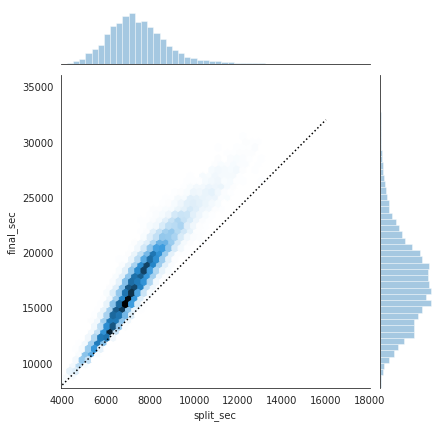

In [8]:
import numpy as np
%matplotlib inline
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k');

### 4 - Caracterizar corredores

Los corredores se dividen en dos: los que corren más rápido la primera mitad que la segunda y viceversa. 

Crear una nueva columna para visualizar esta relación:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

Visualizar la distribución de esta nueva variable, dibujando una línea en el eje vertical que separe los valores menores y mayores que cero.


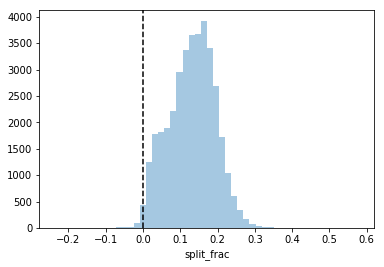

In [9]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

¿Cuántos corredores fueron más lento en la primera mitad?

In [10]:
sum(data.split_frac < 0)

251

* Veamos ahora si existe alguna correlación entre esta variable y todas las otras:

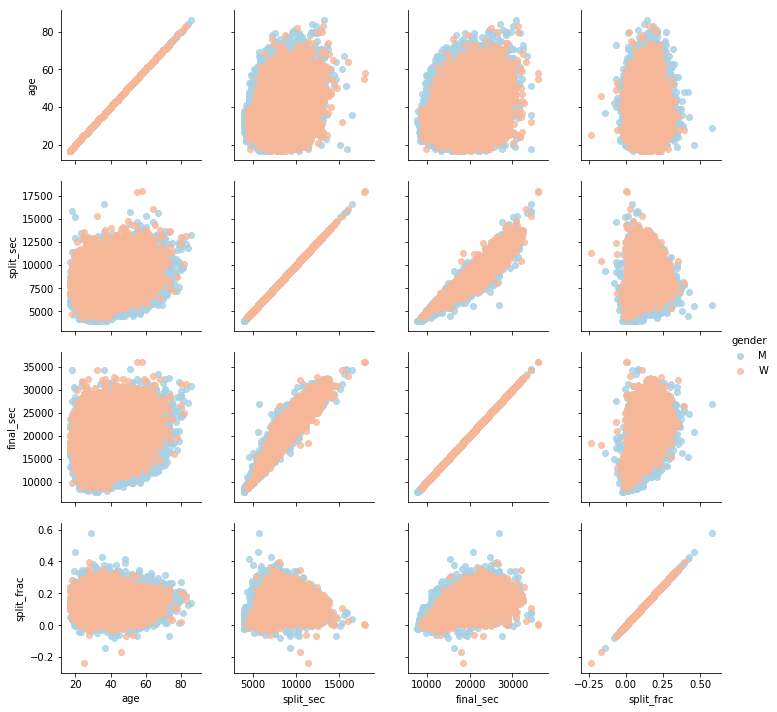

In [11]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

* Veamos ahora un histograma de las fracciones de split entre hombres y mujeres:

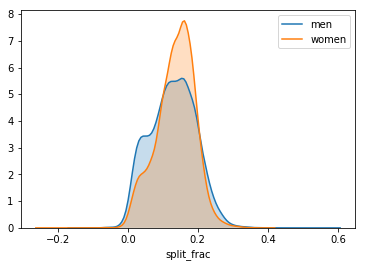

In [12]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

* También podríamos comparar ambas distribuciones usando un boxplot o un violinplot

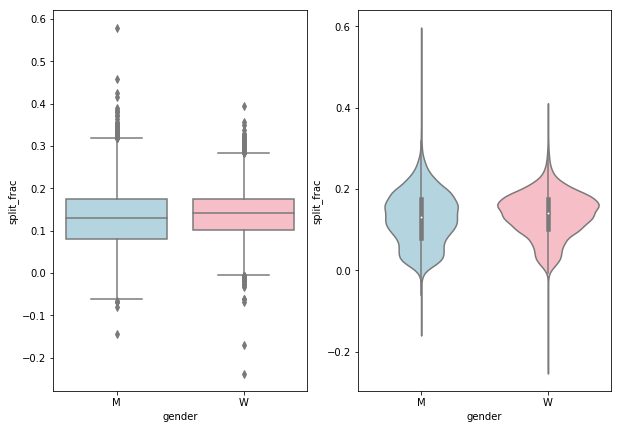

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(10,7))

sns.boxplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"], ax=axs[0])
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"], ax=axs[1]);

* Generemos, ahora, este tipo de plots pero como función de la edad.
* Comencemos por crear una nueva columna en el array que especifique la década de edad de la persona (lo que están en "los '30", en "los '40", etc.)

In [14]:
data['age_dec'] = data.age.apply(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


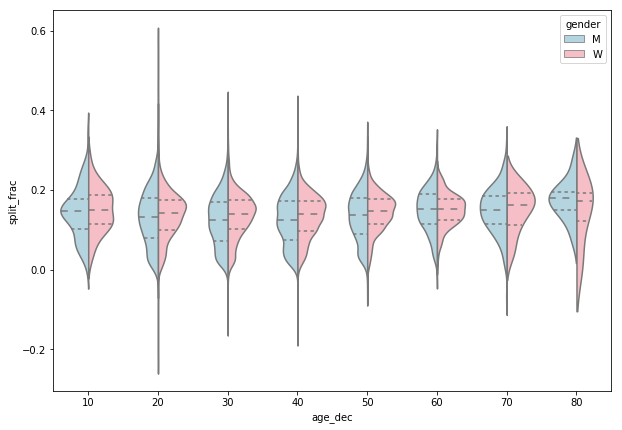

In [15]:
#men = (data.gender == 'M')
#women = (data.gender == 'W')
plt.figure(figsize=(10,7))
sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

* ¿Hay correlación con el "split" y con el hecho de haber terminado más rápido la carrera? 

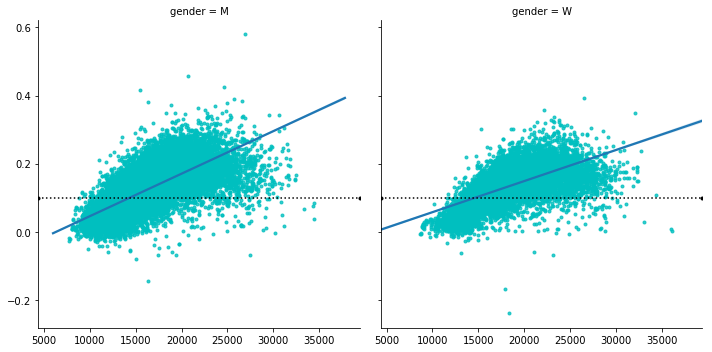

In [16]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");